# Applying Classification Modeling

The goal of this week's assessment is to find the model which best predicts whether or not a person will default on their credit card payment. In doing so, we want to utilize all of the different tools we have learned over the course: data cleaning, EDA, feature engineering/transformation, feature selection, hyperparameter tuning, and model evaluation. 


#### Data Set Information:

- This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

- NT is the abbreviation for New Taiwan. 


#### Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
    - X6 = the repayment status in September, 2005; 
    - X7 = the repayment status in August, 2005; . . .;
    - etc...
    - X11 = the repayment status in April, 2005. 
    - The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- X12-X17: Amount of bill statement (NT dollar). 
    - X12 = amount of bill statement in September, 2005;
    - etc...
    - X13 = amount of bill statement in August, 2005; . . .; 
    - X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). 
    - X18 = amount paid in September, 2005; 
    - X19 = amount paid in August, 2005; . . .;
    - etc...
    - X23 = amount paid in April, 2005. 




You will fit three different models (KNN, Logistic Regression, and Decision Tree Classifier) to predict credit card defaults and use gridsearch to find the best hyperparameters for those models. Then you will compare the performance of those three models on a test set to find the best one.  


## Process/Expectations

- You will be working in pairs for this assessment

### Please have ONE notebook and be prepared to explain how you worked with your partner.

1. Clean up your data set so that you can perform an EDA. 
    - This includes handling null values, categorical variables, removing unimportant columns, and removing outliers.
2. Perform EDA to identify opportunities to create new features.
    - [Great Example of EDA for classification](https://www.kaggle.com/stephaniestallworth/titanic-eda-classification-end-to-end) 
    - [Using Pairplots with Classification](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166)
3. Engineer new features. 
    - Create polynomial and/or interaction features. 
    - Additionaly, you must also create **at least 2 new features** that are not interactions or polynomial transformations. 
        - *For example, you can create a new dummy variable that based on the value of a continuous variable (billamount6 >2000) or take the average of some past amounts.*
4. Perform some feature selection. 
    
5. You must fit **three** models to your data and tune **at least 1 hyperparameter** per model. 
6. Using the F-1 Score, evaluate how well your models perform and identify your best model.
7. Using information from your EDA process and your model(s) output provide insight as to which borrowers are more likely to deafult


# 0. Imports and Functions

In [1]:
# import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

%matplotlib inline

warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",300)

## Functions

In [2]:
import itertools
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
plt.rcParams["figure.figsize"] = [10,5]

def evaluate_classifier(y_test, y_pred, classes = ['No Default', 'Default'], normalize=False):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    cm = confusion_matrix(y_test,y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    sens = metrics.recall_score(y_test, y_pred)
    f_1 = 2*(prec*sens)/(prec+sens) 
    print('Our Accuracy is:', acc)
    print('Our Precision is:', prec)
    print('Our Sensitivity is:', sens )
    print('Our F-Score is:', f_1)
    
    result_dict = {"accuracy": acc,
                  "precission": prec,
                  "sensitivity": sens,
                  "f_1" : f_1,
                  "confusion_matrix" : confusion_matrix(y_test,y_pred)}
    return result_dict



In [3]:
def plot_confusion_matrix(y_test, y_pred, classes,normalize=False):
    cm = confusion_matrix(y_test, y_pred)

## 1. Data Cleaning

In [4]:
df = pd.read_csv('classification_lab_data.csv')

In [5]:
convert = ['LIMIT_BAL','BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',]

In [6]:
for col in convert:
    df[col.lower()+"_$"] = df[col]*0.032
    df.drop(col,axis = 1, inplace = True)

In [7]:
df.rename(columns = {"default payment next month":"default"}, inplace = True)

In [8]:
# maybe change (PAY) -1 , -2 to 0 because all pyments are on time
# change (PAY) col to month

In [9]:
df.head()

,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default,limit_bal_$,bill_amt1_$,bill_amt2_$,bill_amt3_$,bill_amt4_$,bill_amt5_$,bill_amt6_$,pay_amt1_$,pay_amt2_$,pay_amt3_$,pay_amt4_$,pay_amt5_$,pay_amt6_$
0,1,2,2,49,0,0,0,0,0,0,1,1600.0,2887.392,2900.704,2953.888,3004.160,3181.376,3244.544,91.264,89.088,83.296,320.000,101.248,91.776
1,1,2,1,39,0,0,0,0,0,0,0,960.0,668.576,710.592,616.736,527.008,469.440,358.848,64.224,64.000,64.000,13.344,48.000,48.000
2,1,1,2,27,0,0,0,0,0,0,0,8320.0,5078.752,4153.472,3255.072,2454.368,1815.616,1252.288,960.000,132.224,109.120,83.200,57.600,38.400
3,2,2,1,33,0,0,0,0,0,0,0,6400.0,760.384,830.208,863.616,807.584,708.192,440.768,128.000,64.000,19.200,96.000,128.000,3.200
4,1,1,2,27,0,0,0,0,0,0,0,1600.0,467.648,499.904,522.944,564.896,566.304,578.176,49.856,40.896,50.848,20.256,20.992,25.056


In [10]:
df.columns

Index(['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'default', 'limit_bal_$', 'bill_amt1_$',
       'bill_amt2_$', 'bill_amt3_$', 'bill_amt4_$', 'bill_amt5_$',
       'bill_amt6_$', 'pay_amt1_$', 'pay_amt2_$', 'pay_amt3_$', 'pay_amt4_$',
       'pay_amt5_$', 'pay_amt6_$'],
      dtype='object')

In [11]:
y = df.default

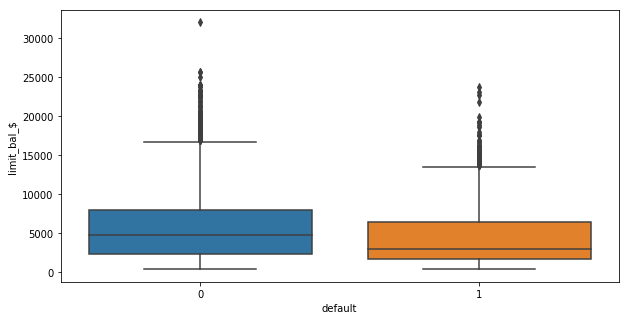

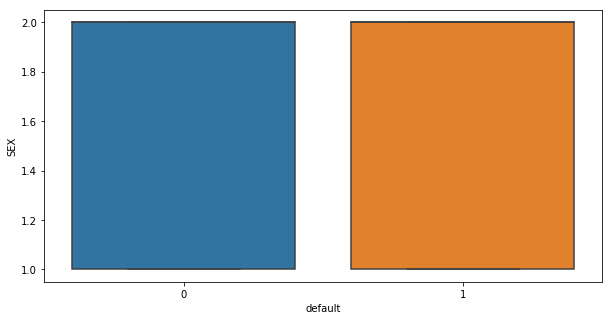

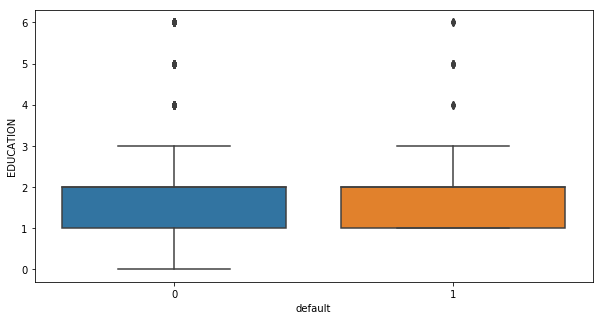

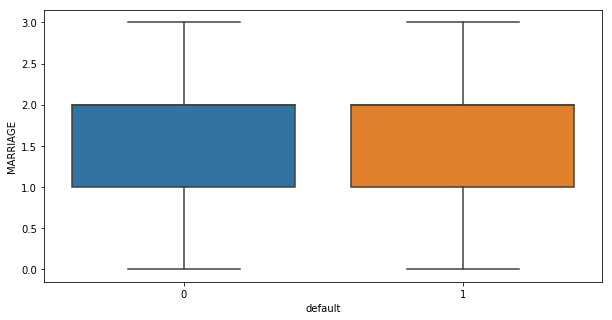

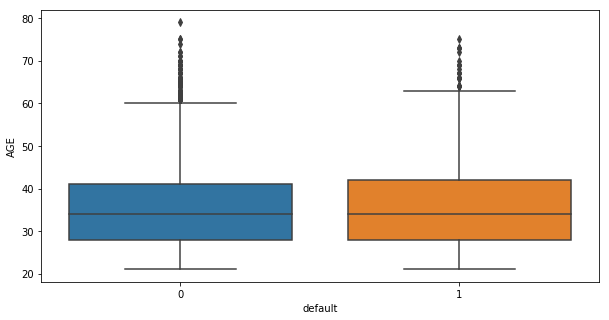

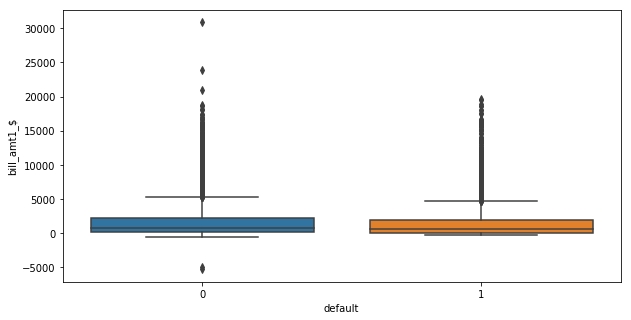

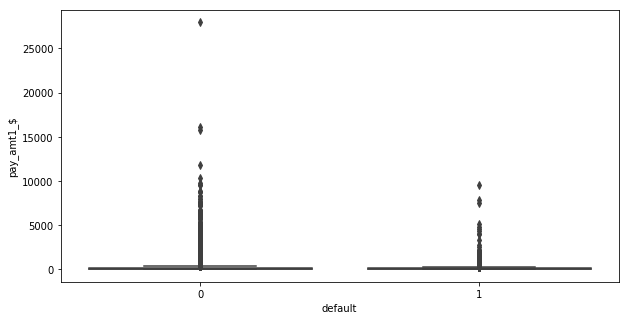

In [12]:
plots = ['limit_bal_$', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', "bill_amt1_$", "pay_amt1_$"]
for col in plots:
    fig = plt.figure
    sns.boxplot(x="default", y=col, data=df)
    plt.show()

In [13]:
df.groupby(["default"]).mean()

,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,limit_bal_$,bill_amt1_$,bill_amt2_$,bill_amt3_$,bill_amt4_$,bill_amt5_$,bill_amt6_$,pay_amt1_$,pay_amt2_$,pay_amt3_$,pay_amt4_$,pay_amt5_$,pay_amt6_$
default,,,,,,,,,,,,,,,,,,,,,,,
0,1.613985,1.844578,1.556739,35.463699,-0.209138,-0.302445,-0.317104,-0.353593,-0.384410,-0.400246,5709.018458,1667.585416,1595.106868,1529.722970,1407.309856,1306.637547,1256.861980,202.274207,215.189839,184.313571,169.151803,168.269164,183.358812
1,1.567069,1.899774,1.529766,35.732856,0.668802,0.455350,0.367747,0.263564,0.172005,0.116993,4178.132208,1591.915750,1548.028823,1482.120464,1381.000555,1294.430185,1249.615699,110.640512,113.173492,111.035955,102.380956,105.567560,113.286806


In [14]:
#sns.lmplot(x='PAY_0', y='default', data=df, ci=None, logistic=True, x_jitter=0.1, y_jitter=0.05)
#sns.set({"alpha":0.3})

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23999 entries, 0 to 23998
Data columns (total 24 columns):
SEX            23999 non-null int64
EDUCATION      23999 non-null int64
MARRIAGE       23999 non-null int64
AGE            23999 non-null int64
PAY_0          23999 non-null int64
PAY_2          23999 non-null int64
PAY_3          23999 non-null int64
PAY_4          23999 non-null int64
PAY_5          23999 non-null int64
PAY_6          23999 non-null int64
default        23999 non-null int64
limit_bal_$    23999 non-null float64
bill_amt1_$    23999 non-null float64
bill_amt2_$    23999 non-null float64
bill_amt3_$    23999 non-null float64
bill_amt4_$    23999 non-null float64
bill_amt5_$    23999 non-null float64
bill_amt6_$    23999 non-null float64
pay_amt1_$     23999 non-null float64
pay_amt2_$     23999 non-null float64
pay_amt3_$     23999 non-null float64
pay_amt4_$     23999 non-null float64
pay_amt5_$     23999 non-null float64
pay_amt6_$     23999 non-null float64
d

In [16]:
df.columns

Index(['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'default', 'limit_bal_$', 'bill_amt1_$',
       'bill_amt2_$', 'bill_amt3_$', 'bill_amt4_$', 'bill_amt5_$',
       'bill_amt6_$', 'pay_amt1_$', 'pay_amt2_$', 'pay_amt3_$', 'pay_amt4_$',
       'pay_amt5_$', 'pay_amt6_$'],
      dtype='object')

In [17]:
#Engineering Credit Length:
credit_cols = ['bill_amt6_$','bill_amt5_$','bill_amt4_$','bill_amt3_$','bill_amt2_$','bill_amt1_$']
payment_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
payment_amt_col = ['pay_amt1_$', 'pay_amt2_$', 'pay_amt3_$', 'pay_amt4_$','pay_amt5_$', 'pay_amt6_$']

#Lenght of credit history
def credit_len (n,credit_cols):
    obs = df.iloc[n]
    for n , col in enumerate(credit_cols):
        if obs[col] > 0:
            return 6-n
    return 0

#Number of Credits taken
def credit_number (n,credit_cols):
    """Counts month in which client had depts"""
    obs = df.iloc[n]
    i = 0
    for col in credit_cols:
        if obs[col]>0:
            i += 1
    return i

#Credit Payment Score
def payment_score(n,payment_cols):
    obs = df.iloc[n]
    return sum([obs[x] for x in payment_cols])
#Sums of payment

def payment_sum(n,payment_amt_col):
    obs = df.iloc[n]
    return sum([obs[col] for col in payment_amt_col])
#Sums of Biills

def bill_sum(n,credit_cols):
    obs = df.iloc[n]
    return sum([obs[col] for col in credit_cols])

### Credit Score Features following the aproach from:
https://www.thebalance.com/what-your-credit-score-is-made-of-960450

In [18]:
df["payment_score"] = [payment_score(n, payment_cols) for n in range(len(df))] #0.375 #the higher the worse

In [19]:
df["cur_debt_rt"] = df["bill_amt1_$"]/df["limit_bal_$"] #0.325 #the higher the worse

In [20]:
df["credit_hist"] = [credit_len(n, credit_cols) for n in range(len(df))] #0.175 #the higher the better

In [21]:
df["credit_number"] = [credit_number(n, credit_cols) for n in range(len(df))] #0.125 #the higher the worse

In [22]:
#more feature engeneering

In [23]:
df["payment_sum"] = [payment_sum(n,payment_amt_col) for n in range(len(df))] 

In [24]:
df["bill_sum"] = [bill_sum(n,credit_cols) for n in range(len(df))] 

In [25]:
df.head()

,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default,limit_bal_$,bill_amt1_$,bill_amt2_$,bill_amt3_$,bill_amt4_$,bill_amt5_$,bill_amt6_$,pay_amt1_$,pay_amt2_$,pay_amt3_$,pay_amt4_$,pay_amt5_$,pay_amt6_$,payment_score,cur_debt_rt,credit_hist,credit_number,payment_sum,bill_sum
0,1,2,2,49,0,0,0,0,0,0,1,1600.0,2887.392,2900.704,2953.888,3004.160,3181.376,3244.544,91.264,89.088,83.296,320.000,101.248,91.776,0.0,1.804620,6,6,776.672,18172.064
1,1,2,1,39,0,0,0,0,0,0,0,960.0,668.576,710.592,616.736,527.008,469.440,358.848,64.224,64.000,64.000,13.344,48.000,48.000,0.0,0.696433,6,6,301.568,3351.200
2,1,1,2,27,0,0,0,0,0,0,0,8320.0,5078.752,4153.472,3255.072,2454.368,1815.616,1252.288,960.000,132.224,109.120,83.200,57.600,38.400,0.0,0.610427,6,6,1380.544,18009.568
3,2,2,1,33,0,0,0,0,0,0,0,6400.0,760.384,830.208,863.616,807.584,708.192,440.768,128.000,64.000,19.200,96.000,128.000,3.200,0.0,0.118810,6,6,438.400,4410.752
4,1,1,2,27,0,0,0,0,0,0,0,1600.0,467.648,499.904,522.944,564.896,566.304,578.176,49.856,40.896,50.848,20.256,20.992,25.056,0.0,0.292280,6,6,207.904,3199.872


## 2. EDA

# Check out t-SNE for EDA!!!

## 3. Feature Engineering

In [26]:
#SEX
df.SEX.value_counts()

2    14486
1     9513
Name: SEX, dtype: int64

In [27]:
df.SEX = df.SEX-1

In [28]:
df.EDUCATION.value_counts().sort_index()

0       11
1     8442
2    11188
3     3994
4      100
5      223
6       41
Name: EDUCATION, dtype: int64

In [29]:
import tpclean.tpclean as tp

In [30]:
col_dict=[{"name":"EDUCATION","bins":[0,1,2,3,4,5,6,99],"labels":[0,1,2,3,4,5,"6+"],"abr":"edu"}]
df = tp.dummy_transformation(df, col_dict, one_hot=True)
df.drop("edu_6+", axis = 1, inplace = True)

In [31]:
df["MARRIAGE"] = df["MARRIAGE"].replace(3,0)

In [32]:
df_linear = df.copy()

In [33]:
#df.to_csv("Credit_data_engineered.csv", index = False)

In [34]:
df.head()

,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default,limit_bal_$,bill_amt1_$,bill_amt2_$,bill_amt3_$,bill_amt4_$,bill_amt5_$,bill_amt6_$,pay_amt1_$,pay_amt2_$,pay_amt3_$,pay_amt4_$,pay_amt5_$,pay_amt6_$,payment_score,cur_debt_rt,credit_hist,credit_number,payment_sum,bill_sum,edu_1,edu_2,edu_3,edu_4,edu_5
0,0,2,49,0,0,0,0,0,0,1,1600.0,2887.392,2900.704,2953.888,3004.160,3181.376,3244.544,91.264,89.088,83.296,320.000,101.248,91.776,0.0,1.804620,6,6,776.672,18172.064,1,0,0,0,0
1,0,1,39,0,0,0,0,0,0,0,960.0,668.576,710.592,616.736,527.008,469.440,358.848,64.224,64.000,64.000,13.344,48.000,48.000,0.0,0.696433,6,6,301.568,3351.200,1,0,0,0,0
2,0,2,27,0,0,0,0,0,0,0,8320.0,5078.752,4153.472,3255.072,2454.368,1815.616,1252.288,960.000,132.224,109.120,83.200,57.600,38.400,0.0,0.610427,6,6,1380.544,18009.568,0,0,0,0,0
3,1,1,33,0,0,0,0,0,0,0,6400.0,760.384,830.208,863.616,807.584,708.192,440.768,128.000,64.000,19.200,96.000,128.000,3.200,0.0,0.118810,6,6,438.400,4410.752,1,0,0,0,0
4,0,2,27,0,0,0,0,0,0,0,1600.0,467.648,499.904,522.944,564.896,566.304,578.176,49.856,40.896,50.848,20.256,20.992,25.056,0.0,0.292280,6,6,207.904,3199.872,0,0,0,0,0


## Base Feature and Target Definition

In [35]:
df = pd.read_csv("Credit_data_engineered.csv")
df.head()

,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default,limit_bal_$,bill_amt1_$,bill_amt2_$,bill_amt3_$,bill_amt4_$,bill_amt5_$,bill_amt6_$,pay_amt1_$,pay_amt2_$,pay_amt3_$,pay_amt4_$,pay_amt5_$,pay_amt6_$,payment_score,cur_debt_rt,credit_hist,credit_number,payment_sum,bill_sum,edu_1,edu_2,edu_3,edu_4,edu_5
0,0,2,49,0,0,0,0,0,0,1,1600.0,2887.392,2900.704,2953.888,3004.160,3181.376,3244.544,91.264,89.088,83.296,320.000,101.248,91.776,0.0,1.804620,6,6,776.672,18172.064,1,0,0,0,0
1,0,1,39,0,0,0,0,0,0,0,960.0,668.576,710.592,616.736,527.008,469.440,358.848,64.224,64.000,64.000,13.344,48.000,48.000,0.0,0.696433,6,6,301.568,3351.200,1,0,0,0,0
2,0,2,27,0,0,0,0,0,0,0,8320.0,5078.752,4153.472,3255.072,2454.368,1815.616,1252.288,960.000,132.224,109.120,83.200,57.600,38.400,0.0,0.610427,6,6,1380.544,18009.568,0,0,0,0,0
3,1,1,33,0,0,0,0,0,0,0,6400.0,760.384,830.208,863.616,807.584,708.192,440.768,128.000,64.000,19.200,96.000,128.000,3.200,0.0,0.118810,6,6,438.400,4410.752,1,0,0,0,0
4,0,2,27,0,0,0,0,0,0,0,1600.0,467.648,499.904,522.944,564.896,566.304,578.176,49.856,40.896,50.848,20.256,20.992,25.056,0.0,0.292280,6,6,207.904,3199.872,0,0,0,0,0


In [36]:
base_features = list(df.drop("default", axis = 1).columns)
X = df[base_features]
y = df.default

### Train_Test_Split

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X,y, random_state = 23)

### Deal with class imbalance

In [56]:
# deal with class imbalance
resample_pool = pd.concat([X_train_orig,y_train], axis = 1)
resample_pool.head()

,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,limit_bal_$,bill_amt1_$,bill_amt2_$,bill_amt3_$,bill_amt4_$,bill_amt5_$,bill_amt6_$,pay_amt1_$,pay_amt2_$,pay_amt3_$,pay_amt4_$,pay_amt5_$,pay_amt6_$,payment_score,cur_debt_rt,credit_hist,credit_number,payment_sum,bill_sum,edu_1,edu_2,edu_3,edu_4,edu_5,default
21680,1,1,36,-1,-1,-1,-1,-1,-1,7360.0,140.480,44.864,117.280,29.728,133.344,3684.032,44.864,117.280,29.728,133.344,3684.032,160.000,-6.0,0.019087,6,6,4169.248,4149.728,1,0,0,0,0,0
18718,0,0,52,-2,-2,-2,-2,-2,-2,1600.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-12.0,0.000000,0,0,0.000,0.000,0,1,0,0,0,1
20318,1,1,41,0,0,0,0,0,0,1920.0,1108.224,1140.928,1183.712,1206.432,1230.464,1256.160,51.200,61.280,52.000,44.032,45.504,45.920,0.0,0.577200,6,6,299.936,7125.920,1,0,0,0,0,1
15219,0,1,42,-2,-2,-2,-2,-2,-2,9920.0,84.704,134.592,59.456,97.824,81.216,98.208,134.592,59.456,97.824,81.216,98.208,210.912,-12.0,0.008539,6,6,682.208,556.000,1,0,0,0,0,1
23837,1,2,25,1,-2,-2,-1,-1,-1,10880.0,0.000,0.000,0.000,60.416,152.864,152.064,0.000,0.000,60.416,152.864,152.064,60.416,-6.0,0.000000,6,3,425.760,365.344,1,0,0,0,0,0


In [79]:
resample_pool["default"].value_counts()

0    14017
1     3982
Name: default, dtype: int64

In [87]:
from sklearn.utils import resample

def downsample(resample_pool):
    defaults_df = resample_pool.loc[resample_pool["default"] == 1]
    non_defaults_df = resample_pool.loc[resample_pool["default"] == 0]
    out = resample(non_defaults_df , n_samples = len(defaults_df), replace = False, random_state = 23)
    ret = pd.concat([out,defaults_df])
    return ret

In [88]:
down_sampled_1 = downsample(resample_pool)
X_train_resampled = down_sampled_1.drop("default", axis = 1)
y_train_resampled = down_sampled_1.default

In [114]:
X_train_orig = X_train_resampled.copy()
y_train = y_train_resampled.copy()

In [115]:
X_train_orig.shape, y_train_orig.shape

((7964, 33), (7964,))

In [116]:
y_train_orig.value_counts()

1    3982
0    3982
Name: default, dtype: int64

### Add Polynomials and Interaction Terms

In [117]:
from sklearn.preprocessing import PolynomialFeatures

In [118]:
columns = list(X.columns)
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly_2.fit(X)

X_train_poly_2 = pd.DataFrame(poly_2.transform(X_train_orig), columns=poly_2.get_feature_names(columns))
X_test_poly_2 = pd.DataFrame(poly_2.transform(X_test_orig), columns=poly_2.get_feature_names(columns))
base_features_poly  = poly_2.get_feature_names(columns)

## Scaling

In [119]:
from sklearn.preprocessing import StandardScaler

### For Poly

In [120]:
X_train_poly = X_train_poly_2.copy()
X_test_poly = X_test_poly_2.copy()

In [121]:
poly_2_scaler = StandardScaler()
poly_2_scaler.fit(X_train_poly)
X_train_poly = pd.DataFrame(poly_2_scaler.transform(X_train_poly), columns = list(X_train_poly.columns))
X_test_poly = pd.DataFrame(poly_2_scaler.transform(X_test_poly), columns = list(X_train_poly.columns))

In [122]:
X_train_poly.head()

,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,limit_bal_$,bill_amt1_$,bill_amt2_$,bill_amt3_$,bill_amt4_$,bill_amt5_$,bill_amt6_$,pay_amt1_$,pay_amt2_$,pay_amt3_$,pay_amt4_$,pay_amt5_$,pay_amt6_$,payment_score,cur_debt_rt,credit_hist,credit_number,payment_sum,bill_sum,edu_1,edu_2,edu_3,edu_4,edu_5,SEX^2,SEX MARRIAGE,SEX AGE,SEX PAY_0,SEX PAY_2,SEX PAY_3,SEX PAY_4,SEX PAY_5,SEX PAY_6,SEX limit_bal_$,SEX bill_amt1_$,SEX bill_amt2_$,SEX bill_amt3_$,SEX bill_amt4_$,SEX bill_amt5_$,SEX bill_amt6_$,SEX pay_amt1_$,SEX pay_amt2_$,SEX pay_amt3_$,SEX pay_amt4_$,SEX pay_amt5_$,SEX pay_amt6_$,SEX payment_score,SEX cur_debt_rt,SEX credit_hist,SEX credit_number,SEX payment_sum,SEX bill_sum,SEX edu_1,SEX edu_2,SEX edu_3,SEX edu_4,SEX edu_5,MARRIAGE^2,MARRIAGE AGE,MARRIAGE PAY_0,MARRIAGE PAY_2,MARRIAGE PAY_3,MARRIAGE PAY_4,MARRIAGE PAY_5,MARRIAGE PAY_6,MARRIAGE limit_bal_$,MARRIAGE bill_amt1_$,MARRIAGE bill_amt2_$,MARRIAGE bill_amt3_$,MARRIAGE bill_amt4_$,MARRIAGE bill_amt5_$,MARRIAGE bill_amt6_$,MARRIAGE pay_amt1_$,MARRIAGE pay_amt2_$,MARRIAGE pay_amt3_$,MARRIAGE pay_amt4_$,MARRIAGE pay_amt5_$,MARRIAGE pay_amt6_$,MARRIAGE payment_score,MARRIAGE cur_debt_rt,MARRIAGE credit_hist,MARRIAGE credit_number,MARRIAGE payment_sum,MARRIAGE bill_sum,MARRIAGE edu_1,MARRIAGE edu_2,MARRIAGE edu_3,MARRIAGE edu_4,MARRIAGE edu_5,AGE^2,AGE PAY_0,AGE PAY_2,AGE PAY_3,AGE PAY_4,AGE PAY_5,AGE PAY_6,AGE limit_bal_$,AGE bill_amt1_$,AGE bill_amt2_$,AGE bill_amt3_$,AGE bill_amt4_$,AGE bill_amt5_$,AGE bill_amt6_$,AGE pay_amt1_$,AGE pay_amt2_$,AGE pay_amt3_$,AGE pay_amt4_$,AGE pay_amt5_$,AGE pay_amt6_$,AGE payment_score,AGE cur_debt_rt,AGE credit_hist,AGE credit_number,AGE payment_sum,AGE bill_sum,AGE edu_1,AGE edu_2,AGE edu_3,AGE edu_4,AGE edu_5,PAY_0^2,PAY_0 PAY_2,PAY_0 PAY_3,PAY_0 PAY_4,PAY_0 PAY_5,PAY_0 PAY_6,PAY_0 limit_bal_$,PAY_0 bill_amt1_$,PAY_0 bill_amt2_$,PAY_0 bill_amt3_$,PAY_0 bill_amt4_$,PAY_0 bill_amt5_$,PAY_0 bill_amt6_$,PAY_0 pay_amt1_$,PAY_0 pay_amt2_$,PAY_0 pay_amt3_$,PAY_0 pay_amt4_$,PAY_0 pay_amt5_$,PAY_0 pay_amt6_$,PAY_0 payment_score,PAY_0 cur_debt_rt,...,pay_amt1_$ pay_amt4_$,pay_amt1_$ pay_amt5_$,pay_amt1_$ pay_amt6_$,pay_amt1_$ payment_score,pay_amt1_$ cur_debt_rt,pay_amt1_$ credit_hist,pay_amt1_$ credit_number,pay_amt1_$ payment_sum,pay_amt1_$ bill_sum,pay_amt1_$ edu_1,pay_amt1_$ edu_2,pay_amt1_$ edu_3,pay_amt1_$ edu_4,pay_amt1_$ edu_5,pay_amt2_$^2,pay_amt2_$ pay_amt3_$,pay_amt2_$ pay_amt4_$,pay_amt2_$ pay_amt5_$,pay_amt2_$ pay_amt6_$,pay_amt2_$ payment_score,pay_amt2_$ cur_debt_rt,pay_amt2_$ credit_hist,pay_amt2_$ credit_number,pay_amt2_$ payment_sum,pay_amt2_$ bill_sum,pay_amt2_$ edu_1,pay_amt2_$ edu_2,pay_amt2_$ edu_3,pay_amt2_$ edu_4,pay_amt2_$ edu_5,pay_amt3_$^2,pay_amt3_$ pay_amt4_$,pay_amt3_$ pay_amt5_$,pay_amt3_$ pay_amt6_$,pay_amt3_$ payment_score,pay_amt3_$ cur_debt_rt,pay_amt3_$ credit_hist,pay_amt3_$ credit_number,pay_amt3_$ payment_sum,pay_amt3_$ bill_sum,pay_amt3_$ edu_1,pay_amt3_$ edu_2,pay_amt3_$ edu_3,pay_amt3_$ edu_4,pay_amt3_$ edu_5,pay_amt4_$^2,pay_amt4_$ pay_amt5_$,pay_amt4_$ pay_amt6_$,pay_amt4_$ payment_score,pay_amt4_$ cur_debt_rt,pay_amt4_$ credit_hist,pay_amt4_$ credit_number,pay_amt4_$ payment_sum,pay_amt4_$ bill_sum,pay_amt4_$ edu_1,pay_amt4_$ edu_2,pay_amt4_$ edu_3,pay_amt4_$ edu_4,pay_amt4_$ edu_5,pay_amt5_$^2,pay_amt5_$ pay_amt6_$,pay_amt5_$ payment_score,pay_amt5_$ cur_debt_rt,pay_amt5_$ credit_hist,pay_amt5_$ credit_number,pay_amt5_$ payment_sum,pay_amt5_$ bill_sum,pay_amt5_$ edu_1,pay_amt5_$ edu_2,pay_amt5_$ edu_3,pay_amt5_$ edu_4,pay_amt5_$ edu_5,pay_amt6_$^2,pay_amt6_$ payment_score,pay_amt6_$ cur_debt_rt,pay_amt6_$ credit_hist,pay_amt6_$ credit_number,pay_amt6_$ payment_sum,pay_amt6_$ bill_sum,pay_amt6_$ edu_1,pay_amt6_$ edu_2,pay_amt6_$ edu_3,pay_amt6_$ edu_4,pay_amt6_$ edu_5,payment_score^2,payment_score cur_debt_rt,payment_score credit_hist,payment_score credit_number,payment_score payment_sum,payment_score bill_sum,payment_score edu_1,payment_score edu_2,payment_score edu_3,payment_score edu_4,p

### For Linear

In [123]:
X_train_lin = X_train_orig.copy()
X_test_lin = X_test_orig.copy()

In [124]:
X_test_lin.shape

(6000, 33)

In [125]:
#define our Dataset
X = df[base_features]

#fit scaler
linear_scaler = StandardScaler()
linear_scaler.fit(X_train_lin)

#apply the scaling
X_train_lin = pd.DataFrame(linear_scaler.transform(X_train_lin), columns = X_train_lin.columns)
X_test_lin = pd.DataFrame(linear_scaler.transform(X_test_lin), columns = X_train_lin.columns)

In [126]:
X_train_lin.head()

,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,limit_bal_$,bill_amt1_$,bill_amt2_$,bill_amt3_$,bill_amt4_$,bill_amt5_$,bill_amt6_$,pay_amt1_$,pay_amt2_$,pay_amt3_$,pay_amt4_$,pay_amt5_$,pay_amt6_$,payment_score,cur_debt_rt,credit_hist,credit_number,payment_sum,bill_sum,edu_1,edu_2,edu_3,edu_4,edu_5
0,0.847048,-0.96008,-0.388753,-0.172166,-0.046669,-0.017071,0.041719,0.095221,0.119029,-1.071226,-0.474990,-0.453868,-0.429256,-0.397698,-0.360763,-0.334432,-0.240307,-0.214137,-0.223507,-0.223406,-0.194473,-0.233915,0.004206,0.784898,0.368944,0.470510,-0.415467,-0.430325,1.050495,-0.461227,-0.052632,-0.087127,-0.035457
1,0.847048,-0.96008,2.591169,-0.966104,-0.796011,-0.764080,-0.720327,-0.690624,-0.654173,0.360663,-0.679391,-0.677641,-0.674791,-0.663445,-0.644276,-0.639134,-0.331062,-0.286956,-0.261149,-0.256573,-0.274280,-0.252059,-0.901055,-1.069374,0.368944,0.470510,-0.516418,-0.693408,1.050495,-0.461227,-0.052632,-0.087127,-0.035457
2,0.847048,-0.96008,-0.069476,-1.760042,-1.545353,-1.511089,-1.482374,-1.476469,-1.427375,0.599311,-0.655895,-0.661934,-0.629827,-0.617768,-0.653193,-0.591231,-0.245508,-0.089276,-0.076989,-0.296167,-0.066451,0.001772,-1.806315,-1.051886,0.368944,-0.154118,-0.227397,-0.664154,1.050495,-0.461227,-0.052632,-0.087127,-0.035457
3,0.847048,-0.96008,1.420485,-0.172166,-0.046669,-1.511089,-1.482374,-1.476469,-1.427375,-0.196183,1.109557,-0.694760,-0.693611,-0.682381,-0.666568,-0.659573,-0.360912,-0.316429,-0.285828,-0.296460,-0.302906,-0.275693,-1.202808,1.372369,-3.050031,-2.652628,-0.570809,-0.365268,-0.951932,2.168130,-0.052632,-0.087127,-0.035457
4,-1.180571,-0.96008,1.952614,-1.760042,-1.545353,-1.511089,-1.482374,-1.476469,-1.427375,-0.832578,-0.663325,-0.653354,-0.681516,-0.638265,-0.653128,-0.613639,-0.200055,-0.316429,-0.159627,-0.296460,-0.163823,-0.275693,-1.806315,-0.998170,0.368944,-0.778745,-0.443113,-0.680174,1.050495,-0.461227,-0.052632,-0.087127,-0.035457


## 4. Feature Selection

In [127]:
#
model_results = {}

In [128]:
from sklearn.linear_model import LogisticRegression

In [129]:
# linear base_model
features = base_features
X_train = X_train_lin[features]
X_test = X_test_lin[features]

In [130]:
logR_base = LogisticRegression()
logR_base.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Normalized confusion matrix
[[0.75524176 0.24475824]
 [0.38536953 0.61463047]]


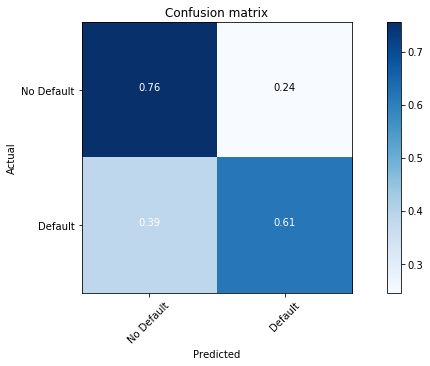

Our Accuracy is: 0.7241666666666666
Our Precision is: 0.4160285860132721
Our Sensitivity is: 0.6146304675716441
Our F-Score is: 0.49619482496194833


In [131]:
y_pred = logR_base.predict(X_test)
model_results["logR_lin_base"] = evaluate_classifier(y_test,y_pred,normalize = True)

In [132]:
# poly base model
features = base_features_poly
X_train = X_train_poly[features]
X_test = X_test_poly[features]

In [133]:
logR_base_poly = LogisticRegression()
logR_base_poly.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Normalized confusion matrix
[[0.77364142 0.22635858]
 [0.36500754 0.63499246]]


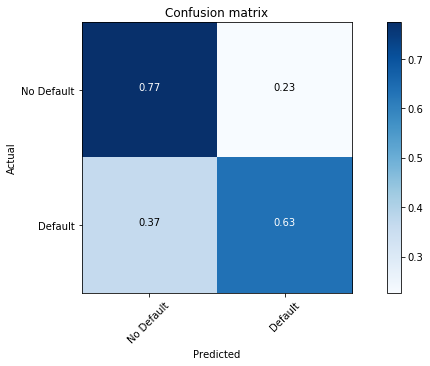

Our Accuracy is: 0.743
Our Precision is: 0.4431578947368421
Our Sensitivity is: 0.6349924585218703
Our F-Score is: 0.5220086794792311


In [134]:
y_pred = logR_base_poly.predict(X_test)
model_results["logR_poly_base"] = evaluate_classifier(y_test,y_pred,normalize = True)

In [ ]:
sns.distplot(defaults.AGE)
sns.distplot(non_defaults.AGE)

In [ ]:
sns.distplot(defaults.EDUCATION)
sns.distplot(non_defaults.EDUCATION)

In [ ]:
defaults = df.loc[df["default"]==1]
non_defaults = df.loc[df["default"]==0]

## 5. Model Fitting and Hyperparameter Tuning
KNN, Logistic Regression, Decision Tree

## 6. Model Evaluation

## 7. Final Model

# Trash

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
credit_score_values = {"payment_score": 0.375,
                        "cur_debt_rt": 0.325,
                        "credit_hist": 0.175,
                       "credit_number": 0.125}

In [ ]:
scaler_min_max = MinMaxScaler()
subset = X_train[credit_score_values.keys()]
scaler_min_max.fit(subset)
subset_df = pd.DataFrame(scaler_min_max.transform(subset), columns = list(subset.columns))

In [ ]:
np.zeros(len(df))

In [ ]:
# invert credit hist to map it the higher the worse
subset_df["credit_hist"] = 1 - subset_df["credit_hist"]

In [ ]:
def bgtp_credit_score(df):
    out = np.zeros(len(df))
    for key in credit_score_values.keys():
        out += df[key]*credit_score_values[key]
    return out